## Proyecto Modulo 2

### Tabla de Amortización

- Para el siguiente proyecto del modulo 2, decidimos realizar una tabla de amortización cotizando un auto con un valor de $250,000$ aproximadamente, en una agencia y un banco para comparar donde sería conveniente 

### Objetivo General

- Observar el comportamiento de las tasas de interés y las amortizaciones en el tiempo, para la toma de decisiones

### Objetivos secundarios

- Utilizar lo visto en clase para construir una tabla de amortización
- Graficar los resultados para compararlos
- Mostrar el monto total a pagar con ambos financiamientos 

### Librerías

In [79]:
import pandas as pd
from datetime import date
import numpy as np
from collections import OrderedDict
from dateutil.relativedelta import *
import matplotlib.pyplot as plt
%matplotlib inline

Carro 27 Vento Gighline STD 2018 con un valor de $250,000


## - - - <font color= purple> **Wolfsburg de Occidente** </font> - - -

### - -<font color  = blue>  Primer caso: 36 meses </font>

Enganche  = $64,925.81

In [80]:
principal = 200000
years =3 

In [81]:
fixed_income = 0.1209
CAT=0.2105
IVA=0.16

In [82]:
interes_por = fixed_income+CAT+IVA
interes_por

0.49139999999999995

In [83]:
def amortizar(principal, interes_por, years, abono_principal, pagos_anuales=12, start_date=date.today()):

    pmt = -round(np.pmt(interes_por/pagos_anuales, years*pagos_anuales, principal), 2)
    
    p = 1
    ini_balance = principal
    fin_balance = principal
    
    while fin_balance > 0:

        # Recalculate the interest based on the current balance
        interes = round(((interes_por/pagos_anuales) * ini_balance), 2)

        # Determine payment based on whether or not this period will pay off the loan
        pmt = min(pmt, ini_balance + interes)
        principal = pmt - interes

        # Ensure additional payment gets adjusted if the loan is being paid off
        abono_principal = min(abono_principal, ini_balance - principal)
        fin_balance = ini_balance - (principal + abono_principal)

        yield OrderedDict([('Mes',start_date),
                           ('Periodo', p),
                           ('Incio Balance', ini_balance),
                           ('Pago', pmt),
                           ('Principal', principal),
                           ('Interes', interes),
                           ('Pago Adicional', abono_principal),
                           ('Fin Balance', fin_balance)])

        # Increment the counter, balance and date
        p += 1
        start_date += relativedelta(months=1)
        ini_balance = fin_balance


In [84]:
schedule = pd.DataFrame(amortizar(principal, interes_por, years, abono_principal=0, start_date=date(2018, 4,10)))
schedule.head(36)

,Mes,Periodo,Incio Balance,Pago,Principal,Interes,Pago Adicional,Fin Balance
0,2018-04-10,1,200000.00,10716.94,2526.94,8190.00,0,197473.06
1,2018-05-10,2,197473.06,10716.94,2630.42,8086.52,0,194842.64
2,2018-06-10,3,194842.64,10716.94,2738.13,7978.81,0,192104.51
3,2018-07-10,4,192104.51,10716.94,2850.26,7866.68,0,189254.25
4,2018-08-10,5,189254.25,10716.94,2966.98,7749.96,0,186287.27
5,2018-09-10,6,186287.27,10716.94,3088.48,7628.46,0,183198.79
6,2018-10-10,7,183198.79,10716.94,3214.95,7501.99,0,179983.84
7,2018-11-10,8,179983.84,10716.94,3346.60,7370.34,0,176637.24
8,2018-12-10,9,176637.24,10716.94,3483.65,7233.29,0,173153.59
9,2019-01-10,10,173153.59,10716.94,3626.30,7090.64,0,169527.29


In [85]:
Apago_dummie36 = schedule['Principal'] + schedule['Interes']
Apago_dummie36T = sum(Apago_dummie36)
Apago_dummie36T

385810.17999999993

In [86]:
help(sum)

Help on built-in function sum in module builtins:

sum(iterable, start=0, /)
    Return the sum of a 'start' value (default: 0) plus an iterable of numbers
    
    When the iterable is empty, return the start value.
    This function is intended specifically for use with numeric values and may
    reject non-numeric types.



In [87]:
schedule.tail()

,Mes,Periodo,Incio Balance,Pago,Principal,Interes,Pago Adicional,Fin Balance
32,2020-12-10,33,38814.71,10716.94,9127.48,1589.46,0,29687.23
33,2021-01-10,34,29687.23,10716.94,9501.25,1215.69,0,20185.98
34,2021-02-10,35,20185.98,10716.94,9890.32,826.62,0,10295.66
35,2021-03-10,36,10295.66,10716.94,10295.33,421.61,0,0.33
36,2021-04-10,37,0.33,0.34,0.33,0.01,0,0.00


Text(0,0.5,'Fin Balance')

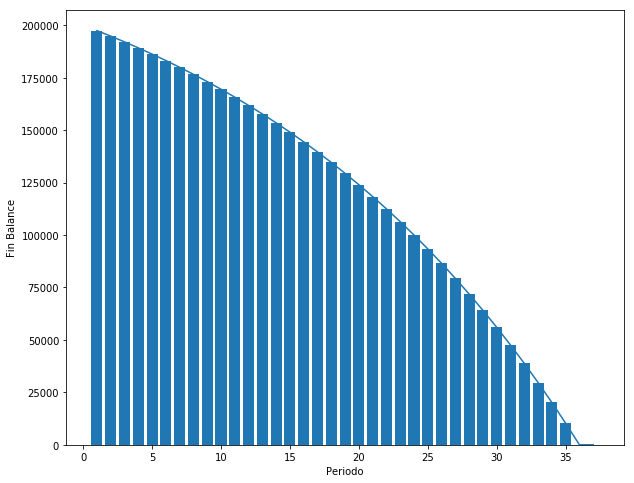

In [88]:
plt.figure(figsize=(10,8))
plt.bar(schedule['Periodo'], schedule['Fin Balance']);
plt.plot(schedule['Periodo'], schedule['Fin Balance']);
plt.xlabel("Periodo")
plt.ylabel("Fin Balance")

Text(0,0.5,'Principal')

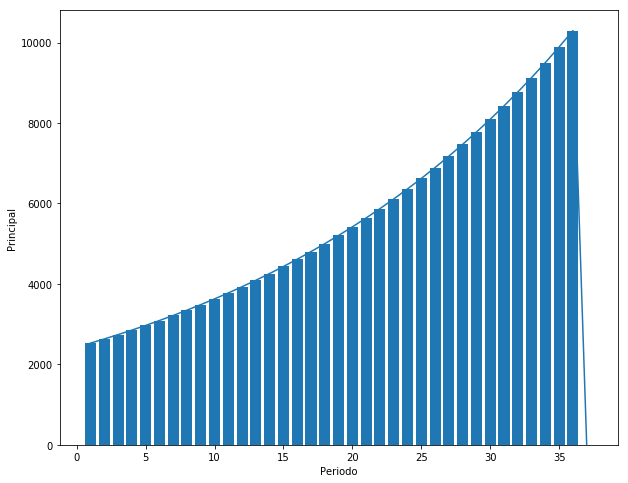

In [89]:
plt.figure(figsize=(10,8))
plt.bar(schedule['Periodo'], schedule['Principal']);
plt.plot(schedule['Periodo'], schedule['Principal']);
plt.xlabel("Periodo")
plt.ylabel("Principal")

Text(0,0.5,'Interes')

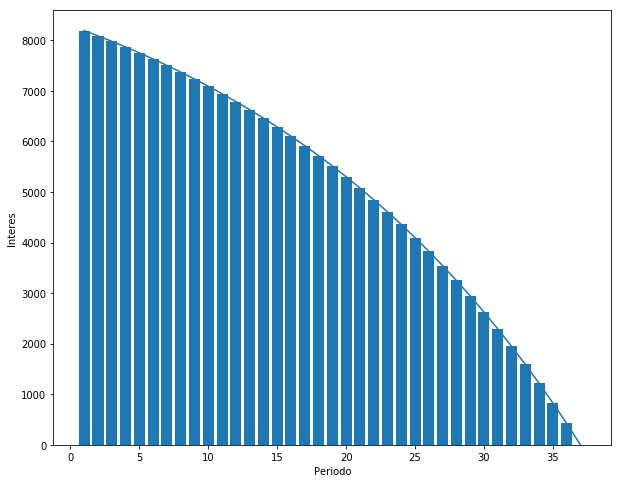

In [90]:
plt.figure(figsize=(10,8))
plt.bar(schedule['Periodo'], schedule['Interes']);
plt.plot(schedule['Periodo'], schedule['Interes']);
plt.xlabel("Periodo")
plt.ylabel("Interes")

### - -<font color  = green>  Primer caso: 48 meses </font>

Enganche  = $63,865.81

In [91]:
principal = 200000
years =4 

In [92]:
fixed_income = 0.1306
CAT=0.2220
IVA=0.16

In [93]:
interes_por= fixed_income+CAT+IVA
interes_por

0.5126000000000001

In [94]:
def amortizar(principal, interes_por, years, abono_principal, pagos_anuales=12, start_date=date.today()):

    pmt = -round(np.pmt(interes_por/pagos_anuales, years*pagos_anuales, principal), 2)
    
    p = 1
    ini_balance = principal
    fin_balance = principal
    
    while fin_balance > 0:

        # Recalculate the interest based on the current balance
        interes = round(((interes_por/pagos_anuales) * ini_balance), 2)

        # Determine payment based on whether or not this period will pay off the loan
        pmt = min(pmt, ini_balance + interes)
        principal = pmt - interes

        # Ensure additional payment gets adjusted if the loan is being paid off
        abono_principal = min(abono_principal, ini_balance - principal)
        fin_balance = ini_balance - (principal + abono_principal)

        yield OrderedDict([('Mes',start_date),
                           ('Periodo', p),
                           ('Incio Balance', ini_balance),
                           ('Pago', pmt),
                           ('Principal', principal),
                           ('Interes', interes),
                           ('Pago Adicional', abono_principal),
                           ('Fin Balance', fin_balance)])

        # Increment the counter, balance and date
        p += 1
        start_date += relativedelta(months=1)
        ini_balance = fin_balance


In [95]:
schedule2 = pd.DataFrame(amortizar(principal, interes_por,years, abono_principal=0, start_date=date(2018, 4,10)))
schedule2.head(48)

,Mes,Periodo,Incio Balance,Pago,Principal,Interes,Pago Adicional,Fin Balance
0,2018-04-10,1,200000.00,9868.49,1325.16,8543.33,0,198674.84
1,2018-05-10,2,198674.84,9868.49,1381.76,8486.73,0,197293.08
2,2018-06-10,3,197293.08,9868.49,1440.79,8427.70,0,195852.29
3,2018-07-10,4,195852.29,9868.49,1502.33,8366.16,0,194349.96
4,2018-08-10,5,194349.96,9868.49,1566.51,8301.98,0,192783.45
5,2018-09-10,6,192783.45,9868.49,1633.42,8235.07,0,191150.03
6,2018-10-10,7,191150.03,9868.49,1703.20,8165.29,0,189446.83
7,2018-11-10,8,189446.83,9868.49,1775.95,8092.54,0,187670.88
8,2018-12-10,9,187670.88,9868.49,1851.82,8016.67,0,185819.06
9,2019-01-10,10,185819.06,9868.49,1930.92,7937.57,0,183888.14


In [96]:
Apago_dummie48 = schedule2['Principal'] + schedule2['Interes']
Apago_dummie48T = sum(Apago_dummie48)
Apago_dummie48T

473687.70999999967

In [97]:
schedule2.tail()

,Mes,Periodo,Incio Balance,Pago,Principal,Interes,Pago Adicional,Fin Balance
44,2021-12-10,45,35593.57,9868.49,8348.05,1520.44,0,27245.52
45,2022-01-10,46,27245.52,9868.49,8704.65,1163.84,0,18540.87
46,2022-02-10,47,18540.87,9868.49,9076.49,792.00,0,9464.38
47,2022-03-10,48,9464.38,9868.49,9464.20,404.29,0,0.18
48,2022-04-10,49,0.18,0.19,0.18,0.01,0,0.00


Text(0,0.5,'Fin Balance')

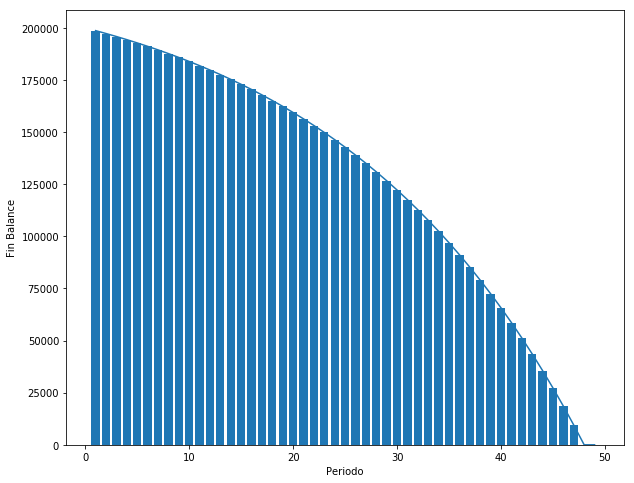

In [98]:
plt.figure(figsize=(10,8))
plt.bar(schedule2['Periodo'], schedule2['Fin Balance']);
plt.plot(schedule2['Periodo'], schedule2['Fin Balance']);
plt.xlabel("Periodo")
plt.ylabel("Fin Balance")

Text(0,0.5,'Principal')

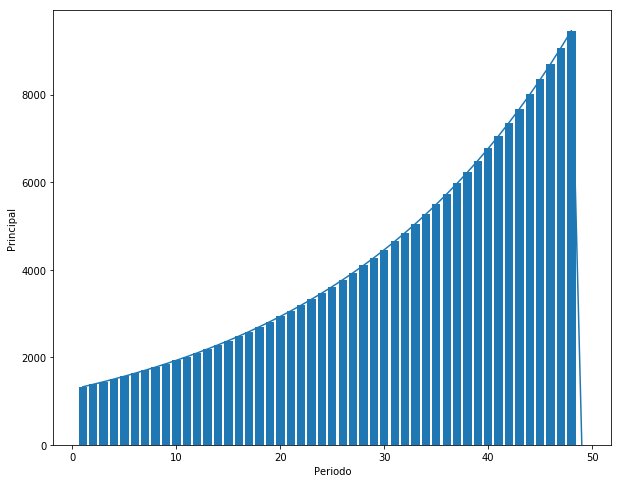

In [99]:
plt.figure(figsize=(10,8))
plt.bar(schedule2['Periodo'], schedule2['Principal']);
plt.plot(schedule2['Periodo'], schedule2['Principal']);
plt.xlabel("Periodo")
plt.ylabel("Principal")

Text(0,0.5,'Interes')

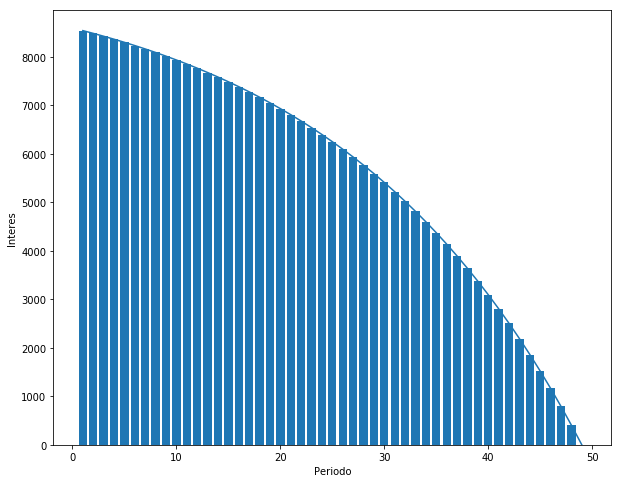

In [100]:
plt.figure(figsize=(10,8))
plt.bar(schedule2['Periodo'], schedule2['Interes']);
plt.plot(schedule2['Periodo'], schedule2['Interes']);
plt.xlabel("Periodo")
plt.ylabel("Interes")

### - -<font color  = purple>  Primer caso: 60 meses </font>

Enganche = $59,869.80

In [101]:
principal = 200000
years = 5

In [102]:
fixed_income = 0.1699
CAT=0.2670
IVA=0.16

In [103]:
interes_por= fixed_income+CAT+IVA
interes_por

0.5969

In [104]:
def amortizar(principal, interes_por, years, abono_principal, pagos_anuales=12, start_date=date.today()):

    pmt = -round(np.pmt(interes_por/pagos_anuales, years*pagos_anuales, principal), 2)
    
    p = 1
    ini_balance = principal
    fin_balance = principal
    
    while fin_balance > 0:

        # Recalculate the interest based on the current balance
        interes = round(((interes_por/pagos_anuales) * ini_balance), 2)

        # Determine payment based on whether or not this period will pay off the loan
        pmt = min(pmt, ini_balance + interes)
        principal = pmt - interes

        # Ensure additional payment gets adjusted if the loan is being paid off
        abono_principal = min(abono_principal, ini_balance - principal)
        fin_balance = ini_balance - (principal + abono_principal)

        yield OrderedDict([('Mes',start_date),
                           ('Periodo', p),
                           ('Incio Balance', ini_balance),
                           ('Pago', pmt),
                           ('Principal', principal),
                           ('Interes', interes),
                           ('Pago Adicional', abono_principal),
                           ('Fin Balance', fin_balance)])

        # Increment the counter, balance and date
        p += 1
        start_date += relativedelta(months=1)
        ini_balance = fin_balance


In [105]:
schedule3 = pd.DataFrame(amortizar(principal, interes_por, years, abono_principal=0, start_date=date(2018, 4,10)))
schedule3.head(60)

,Mes,Periodo,Incio Balance,Pago,Principal,Interes,Pago Adicional,Fin Balance
0,2018-04-10,1,200000.00,10519.90,571.57,9948.33,0,199428.43
1,2018-05-10,2,199428.43,10519.90,600.00,9919.90,0,198828.43
2,2018-06-10,3,198828.43,10519.90,629.84,9890.06,0,198198.59
3,2018-07-10,4,198198.59,10519.90,661.17,9858.73,0,197537.42
4,2018-08-10,5,197537.42,10519.90,694.06,9825.84,0,196843.36
5,2018-09-10,6,196843.36,10519.90,728.58,9791.32,0,196114.78
6,2018-10-10,7,196114.78,10519.90,764.82,9755.08,0,195349.96
7,2018-11-10,8,195349.96,10519.90,802.87,9717.03,0,194547.09
8,2018-12-10,9,194547.09,10519.90,842.80,9677.10,0,193704.29
9,2019-01-10,10,193704.29,10519.90,884.73,9635.17,0,192819.56


In [106]:
Apago_dummie60 = schedule3['Principal'] + schedule3['Interes']
Apago_dummie60T = sum(Apago_dummie60)
Apago_dummie60T

631193.48000000068

In [107]:
schedule3.tail()

,Mes,Periodo,Incio Balance,Pago,Principal,Interes,Pago Adicional,Fin Balance
55,2022-11-10,56,45577.79,10519.90,8252.78,2267.12,0,37325.01
56,2022-12-10,57,37325.01,10519.90,8663.29,1856.61,0,28661.72
57,2023-01-10,58,28661.72,10519.90,9094.22,1425.68,0,19567.50
58,2023-02-10,59,19567.50,10519.90,9546.58,973.32,0,10020.92
59,2023-03-10,60,10020.92,10519.38,10020.92,498.46,0,0.00


Text(0,0.5,'Fin Balance')

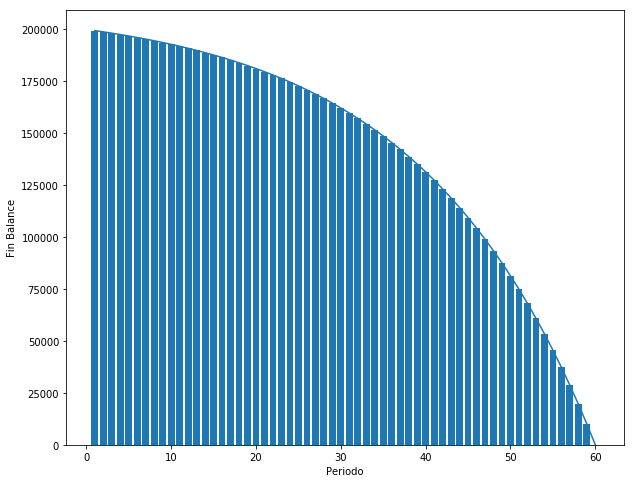

In [108]:
plt.figure(figsize=(10,8))
plt.bar(schedule3['Periodo'], schedule3['Fin Balance']);
plt.plot(schedule3['Periodo'], schedule3['Fin Balance']);
plt.xlabel("Periodo")
plt.ylabel("Fin Balance")

Text(0,0.5,'Principal')

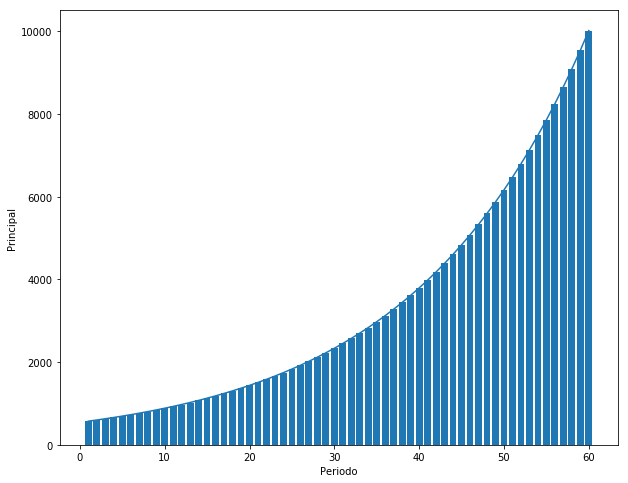

In [109]:
plt.figure(figsize=(10,8))
plt.bar(schedule3['Periodo'], schedule3['Principal']);
plt.plot(schedule3['Periodo'], schedule3['Principal']);
plt.xlabel("Periodo")
plt.ylabel("Principal")

Text(0,0.5,'Interes')

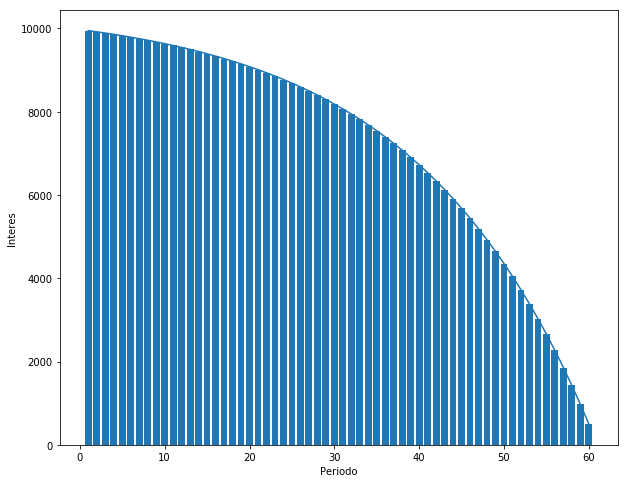

In [110]:
plt.figure(figsize=(10,8))
plt.bar(schedule3['Periodo'], schedule3['Interes']);
plt.plot(schedule3['Periodo'], schedule3['Interes']);
plt.xlabel("Periodo")
plt.ylabel("Interes")

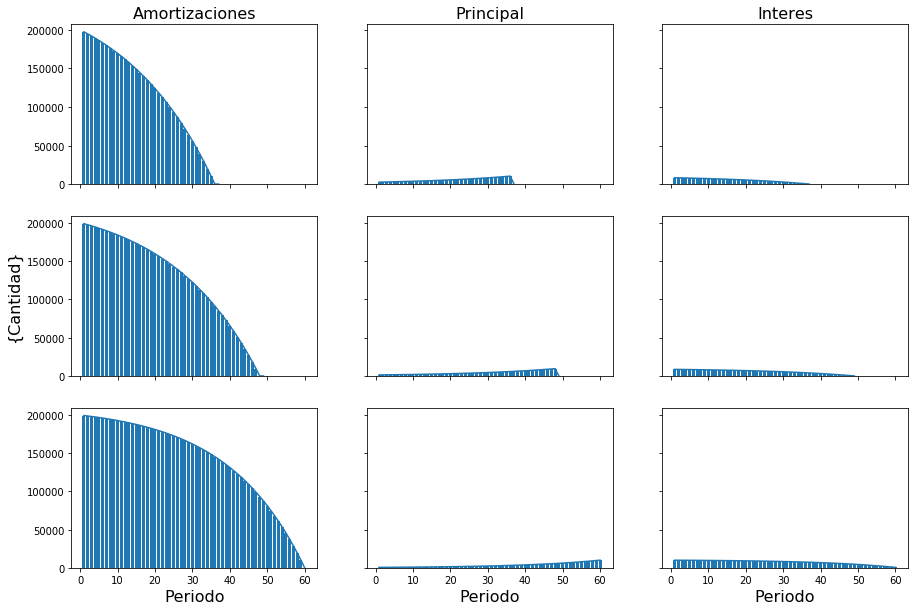

In [111]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6),(ax7,ax8,ax9)) = plt.subplots(3, 3, sharex='col',
                                                       sharey='row',figsize =(15,10))

ax1.plot(schedule['Periodo'], schedule['Fin Balance']);
ax1.bar(schedule['Periodo'], schedule['Fin Balance'])
ax1.set_title('Amortizaciones', fontsize = 16)
ax2.plot(schedule['Periodo'], schedule['Principal']);
ax2.bar(schedule['Periodo'], schedule['Principal']);
ax2.set_title('Principal', fontsize = 16)
ax3.bar(schedule['Periodo'], schedule['Interes']);
ax3.plot(schedule['Periodo'], schedule['Interes']);
ax3.set_title('Interes', fontsize = 16)
ax4.bar(schedule2['Periodo'], schedule2['Fin Balance']);
ax4.plot(schedule2['Periodo'], schedule2['Fin Balance']);
ax4.set_ylabel('{Cantidad}', fontsize = 16)
ax5.bar(schedule2['Periodo'], schedule2['Principal']);
ax5.plot(schedule2['Periodo'], schedule2['Principal']);
ax6.bar(schedule2['Periodo'], schedule2['Interes']);
ax6.plot(schedule2['Periodo'], schedule2['Interes']);
ax7.bar(schedule3['Periodo'], schedule3['Fin Balance']);
ax7.plot(schedule3['Periodo'], schedule3['Fin Balance']);
ax7.set_xlabel('Periodo', fontsize = 16)
ax8.bar(schedule3['Periodo'], schedule3['Principal']);
ax8.plot(schedule3['Periodo'], schedule3['Principal']); 
ax8.set_xlabel('Periodo', fontsize = 16)
ax9.bar(schedule3['Periodo'], schedule3['Interes']);
ax9.plot(schedule3['Periodo'], schedule3['Interes']);   
ax9.set_xlabel('Periodo', fontsize = 16)
plt.show()

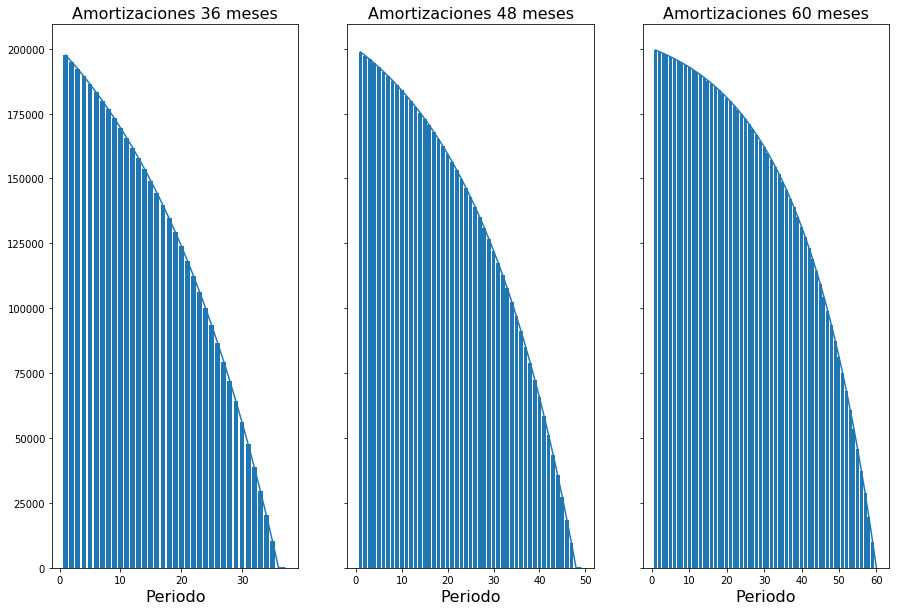

In [112]:
fig, ((ax1), (ax2),(ax3)) = plt.subplots(1, 3, sharex='col',
                                                       sharey='row',figsize =(15,10))

ax1.plot(schedule['Periodo'], schedule['Fin Balance']);
ax1.bar(schedule['Periodo'], schedule['Fin Balance'])
ax1.set_title('Amortizaciones 36 meses', fontsize = 16)
ax3.set_title("Amortizaciones 60 meses", fontsize=16)
ax1.set_xlabel('Periodo', fontsize = 16)
ax2.bar(schedule2['Periodo'], schedule2['Fin Balance']);
ax2.plot(schedule2['Periodo'], schedule2['Fin Balance']);
ax2.set_title("Amortizaciones 48 meses", fontsize=16)
ax2.set_xlabel('Periodo', fontsize = 16)
ax3.bar(schedule3['Periodo'], schedule3['Fin Balance']);
ax3.plot(schedule3['Periodo'], schedule3['Fin Balance']);
ax3.set_title("Amortizaciones 60 meses", fontsize=16)
ax3.set_xlabel('Periodo', fontsize = 16)
plt.show()

## - - - <font color= purple> **Banorte** </font> - - -

### - -<font color  = blue>  Segundo caso: 36 meses </font>

Enganche = 56,186.45


In [113]:
principal = 200000
years =3 

In [114]:
fixed_income = 0.1390
CAT=0.31
IVA=0.16

In [115]:
interes_por= fixed_income+CAT+IVA
interes_por

0.609

In [116]:
def amortizar(principal, interes_por, years, abono_principal, pagos_anuales=12, start_date=date.today()):

    pmt = -round(np.pmt(interes_por/pagos_anuales, years*pagos_anuales, principal), 2)
    
    p = 1
    ini_balance = principal
    fin_balance = principal
    
    while fin_balance > 0:

        # Recalculate the interest based on the current balance
        interes = round(((interes_por/pagos_anuales) * ini_balance), 2)

        # Determine payment based on whether or not this period will pay off the loan
        pmt = min(pmt, ini_balance + interes)
        principal = pmt - interes

        # Ensure additional payment gets adjusted if the loan is being paid off
        abono_principal = min(abono_principal, ini_balance - principal)
        fin_balance = ini_balance - (principal + abono_principal)

        yield OrderedDict([('Mes',start_date),
                           ('Periodo', p),
                           ('Incio Balance', ini_balance),
                           ('Pago', pmt),
                           ('Principal', principal),
                           ('Interes', interes),
                           ('Pago Adicional', abono_principal),
                           ('Fin Balance', fin_balance)])

        # Increment the counter, balance and date
        p += 1
        start_date += relativedelta(months=1)
        ini_balance = fin_balance

In [117]:
schedule4 = pd.DataFrame(amortizar(principal, interes_por, years, abono_principal=0, start_date=date(2018, 4,10)))
schedule4.head(36)

,Mes,Periodo,Incio Balance,Pago,Principal,Interes,Pago Adicional,Fin Balance
0,2018-04-10,1,200000.00,12203.56,2053.56,10150.00,0,197946.44
1,2018-05-10,2,197946.44,12203.56,2157.78,10045.78,0,195788.66
2,2018-06-10,3,195788.66,12203.56,2267.29,9936.27,0,193521.37
3,2018-07-10,4,193521.37,12203.56,2382.35,9821.21,0,191139.02
4,2018-08-10,5,191139.02,12203.56,2503.25,9700.31,0,188635.77
5,2018-09-10,6,188635.77,12203.56,2630.29,9573.27,0,186005.48
6,2018-10-10,7,186005.48,12203.56,2763.78,9439.78,0,183241.70
7,2018-11-10,8,183241.70,12203.56,2904.04,9299.52,0,180337.66
8,2018-12-10,9,180337.66,12203.56,3051.42,9152.14,0,177286.24
9,2019-01-10,10,177286.24,12203.56,3206.28,8997.28,0,174079.96


In [118]:
Vpago_dummie36 = schedule4['Principal'] + schedule4['Interes']
Vpago_dummie36T = sum(Vpago_dummie36)
Vpago_dummie36T

439328.71999999991

In [119]:
schedule4.tail()

,Mes,Periodo,Incio Balance,Pago,Principal,Interes,Pago Adicional,Fin Balance
32,2020-12-10,33,43198.37,12203.56,10011.24,2192.32,0,33187.13
33,2021-01-10,34,33187.13,12203.56,10519.31,1684.25,0,22667.82
34,2021-02-10,35,22667.82,12203.56,11053.17,1150.39,0,11614.65
35,2021-03-10,36,11614.65,12203.56,11614.12,589.44,0,0.53
36,2021-04-10,37,0.53,0.56,0.53,0.03,0,0.00


Text(0,0.5,'Fin Balance')

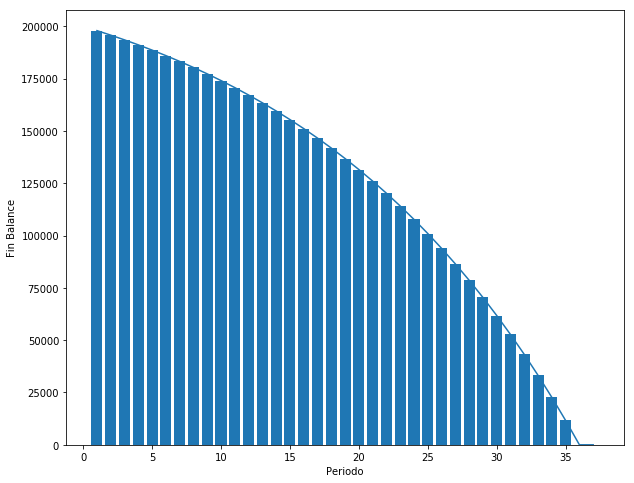

In [120]:
plt.figure(figsize=(10,8))
plt.bar(schedule4['Periodo'], schedule4['Fin Balance']);
plt.plot(schedule4['Periodo'], schedule4['Fin Balance']);
plt.xlabel("Periodo")
plt.ylabel("Fin Balance")

Text(0,0.5,'Principal')

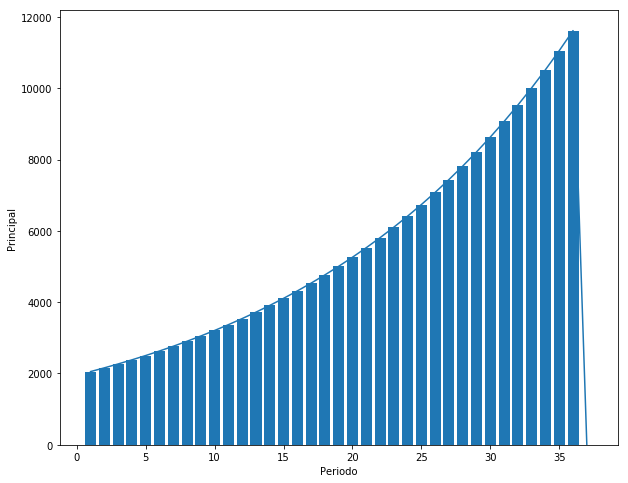

In [121]:
plt.figure(figsize=(10,8))
plt.bar(schedule4['Periodo'], schedule4['Principal']);
plt.plot(schedule4['Periodo'], schedule4['Principal']);
plt.xlabel("Periodo")
plt.ylabel("Principal")

Text(0,0.5,'Interes')

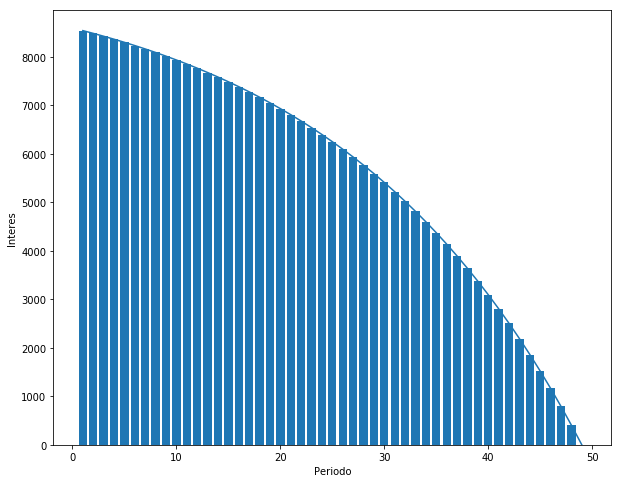

In [122]:
plt.figure(figsize=(10,8))
plt.bar(schedule2['Periodo'], schedule2['Interes']);
plt.plot(schedule2['Periodo'], schedule2['Interes']);
plt.xlabel("Periodo")
plt.ylabel("Interes")

### - -<font color  = green>  Segundo caso: 48 meses </font>

Enganche = 56,186.45

In [123]:
principal = 200000
years =4 

In [124]:
fixed_income = 0.1209
CAT=0.31
IVA=0.16

In [125]:
interes_por= fixed_income+CAT+IVA
interes_por

0.5909

In [126]:
def amortizar(principal, interes_por, years, abono_principal, pagos_anuales=12, start_date=date.today()):

    pmt = -round(np.pmt(interes_por/pagos_anuales, years*pagos_anuales, principal), 2)
    
    p = 1
    ini_balance = principal
    fin_balance = principal
    
    while fin_balance > 0:

        # Recalculate the interest based on the current balance
        interes = round(((interes_por/pagos_anuales) * ini_balance), 2)

        # Determine payment based on whether or not this period will pay off the loan
        pmt = min(pmt, ini_balance + interes)
        principal = pmt - interes

        # Ensure additional payment gets adjusted if the loan is being paid off
        abono_principal = min(abono_principal, ini_balance - principal)
        fin_balance = ini_balance - (principal + abono_principal)

        yield OrderedDict([('Mes',start_date),
                           ('Periodo', p),
                           ('Incio Balance', ini_balance),
                           ('Pago', pmt),
                           ('Principal', principal),
                           ('Interes', interes),
                           ('Pago Adicional', abono_principal),
                           ('Fin Balance', fin_balance)])

        # Increment the counter, balance and date
        p += 1
        start_date += relativedelta(months=1)
        ini_balance = fin_balance

In [127]:
schedule5 = pd.DataFrame(amortizar(principal, interes_por,years, abono_principal=0, start_date=date(2018, 4,10)))
schedule5.head(48)

,Mes,Periodo,Incio Balance,Pago,Principal,Interes,Pago Adicional,Fin Balance
0,2018-04-10,1,200000.00,10936.94,1088.61,9848.33,0,198911.39
1,2018-05-10,2,198911.39,10936.94,1142.21,9794.73,0,197769.18
2,2018-06-10,3,197769.18,10936.94,1198.46,9738.48,0,196570.72
3,2018-07-10,4,196570.72,10936.94,1257.47,9679.47,0,195313.25
4,2018-08-10,5,195313.25,10936.94,1319.39,9617.55,0,193993.86
5,2018-09-10,6,193993.86,10936.94,1384.36,9552.58,0,192609.50
6,2018-10-10,7,192609.50,10936.94,1452.53,9484.41,0,191156.97
7,2018-11-10,8,191156.97,10936.94,1524.05,9412.89,0,189632.92
8,2018-12-10,9,189632.92,10936.94,1599.10,9337.84,0,188033.82
9,2019-01-10,10,188033.82,10936.94,1677.84,9259.10,0,186355.98


In [128]:
Vpago_dummie48 = schedule5['Principal'] + schedule5['Interes']
Vpago_dummie48T = sum(Vpago_dummie48)
Vpago_dummie48T

524972.80000000005

In [129]:
schedule5.tail()

,Mes,Periodo,Incio Balance,Pago,Principal,Interes,Pago Adicional,Fin Balance
43,2021-11-10,44,47450.40,10936.94,8600.40,2336.54,0,38850.00
44,2021-12-10,45,38850.00,10936.94,9023.90,1913.04,0,29826.10
45,2022-01-10,46,29826.10,10936.94,9468.25,1468.69,0,20357.85
46,2022-02-10,47,20357.85,10936.94,9934.49,1002.45,0,10423.36
47,2022-03-10,48,10423.36,10936.62,10423.36,513.26,0,0.00


Text(0,0.5,'Fin Balance')

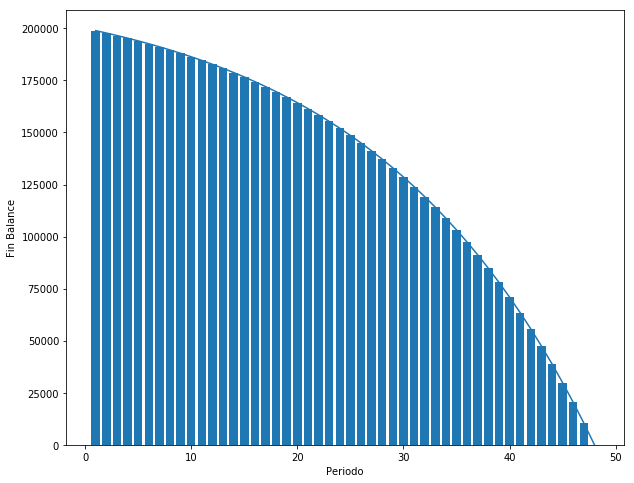

In [130]:
plt.figure(figsize=(10,8))
plt.bar(schedule5['Periodo'], schedule5['Fin Balance']);
plt.plot(schedule5['Periodo'], schedule5['Fin Balance']);
plt.xlabel("Periodo")
plt.ylabel("Fin Balance")

Text(0,0.5,'Principal')

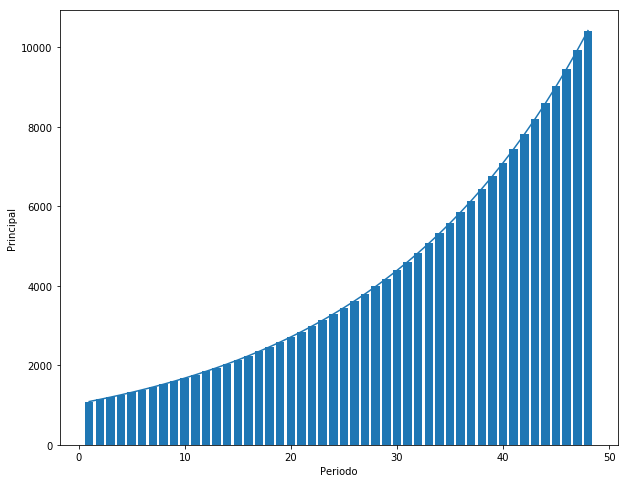

In [131]:
plt.figure(figsize=(10,8))
plt.bar(schedule5['Periodo'], schedule5['Principal']);
plt.plot(schedule5['Periodo'], schedule5['Principal']);
plt.xlabel("Periodo")
plt.ylabel("Principal")

Text(0,0.5,'Interes')

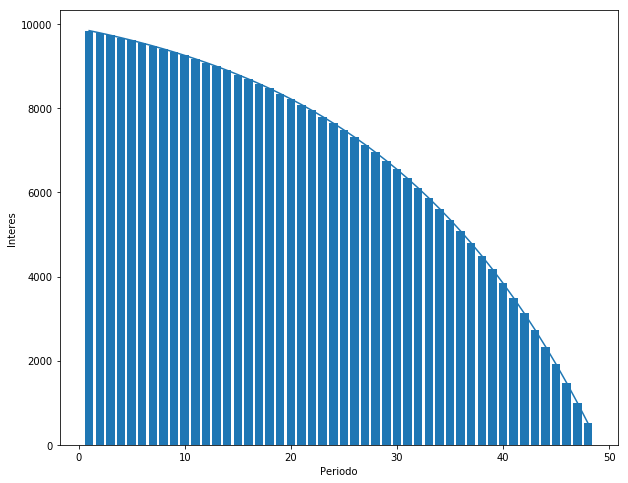

In [132]:
plt.figure(figsize=(10,8))
plt.bar(schedule5['Periodo'], schedule5['Interes']);
plt.plot(schedule5['Periodo'], schedule5['Interes']);
plt.xlabel("Periodo")
plt.ylabel("Interes")

### - -<font color  = purple>  Segundo caso: 60 meses </font>

Enganche = 56,186.45

In [133]:
principal = 200000
years =5

In [134]:
fixed_income = 0.1209
CAT=0.31
IVA=0.16

In [135]:
interes_por= fixed_income+CAT+IVA
interes_por

0.5909

In [136]:
def amortizar(principal, interes_por, years, abono_principal, pagos_anuales=12, start_date=date.today()):

    pmt = -round(np.pmt(interes_por/pagos_anuales, years*pagos_anuales, principal), 2)
    
    p = 1
    ini_balance = principal
    fin_balance = principal
    
    while fin_balance > 0:

        # Recalculate the interest based on the current balance
        interes = round(((interes_por/pagos_anuales) * ini_balance), 2)

        # Determine payment based on whether or not this period will pay off the loan
        pmt = min(pmt, ini_balance + interes)
        principal = pmt - interes

        # Ensure additional payment gets adjusted if the loan is being paid off
        abono_principal = min(abono_principal, ini_balance - principal)
        fin_balance = ini_balance - (principal + abono_principal)

        yield OrderedDict([('Mes',start_date),
                           ('Periodo', p),
                           ('Incio Balance', ini_balance),
                           ('Pago', pmt),
                           ('Principal', principal),
                           ('Interes', interes),
                           ('Pago Adicional', abono_principal),
                           ('Fin Balance', fin_balance)])

        # Increment the counter, balance and date
        p += 1
        start_date += relativedelta(months=1)
        ini_balance = fin_balance

In [137]:
schedule6 = pd.DataFrame(amortizar(principal, interes_por, years, abono_principal=0, start_date=date(2018, 4,10)))
schedule6.head(60)

,Mes,Periodo,Incio Balance,Pago,Principal,Interes,Pago Adicional,Fin Balance
0,2018-04-10,1,200000.00,10431.53,583.20,9848.33,0,199416.80
1,2018-05-10,2,199416.80,10431.53,611.91,9819.62,0,198804.89
2,2018-06-10,3,198804.89,10431.53,642.05,9789.48,0,198162.84
3,2018-07-10,4,198162.84,10431.53,673.66,9757.87,0,197489.18
4,2018-08-10,5,197489.18,10431.53,706.83,9724.70,0,196782.35
5,2018-09-10,6,196782.35,10431.53,741.64,9689.89,0,196040.71
6,2018-10-10,7,196040.71,10431.53,778.16,9653.37,0,195262.55
7,2018-11-10,8,195262.55,10431.53,816.48,9615.05,0,194446.07
8,2018-12-10,9,194446.07,10431.53,856.68,9574.85,0,193589.39
9,2019-01-10,10,193589.39,10431.53,898.87,9532.66,0,192690.52


In [138]:
Vpago_dummie60 = schedule6['Principal'] + schedule6['Interes']
Vpago_dummie60T = sum(Vpago_dummie60)
Vpago_dummie60T

625892.29000000085

In [139]:
schedule6.tail()

,Mes,Periodo,Incio Balance,Pago,Principal,Interes,Pago Adicional,Fin Balance
56,2022-12-10,57,37055.33,10431.53,8606.86,1824.67,0,28448.47
57,2023-01-10,58,28448.47,10431.53,9030.68,1400.85,0,19417.79
58,2023-02-10,59,19417.79,10431.53,9475.37,956.16,0,9942.42
59,2023-03-10,60,9942.42,10431.53,9941.95,489.58,0,0.47
60,2023-04-10,61,0.47,0.49,0.47,0.02,0,0.00


Text(0,0.5,'Fin Balance')

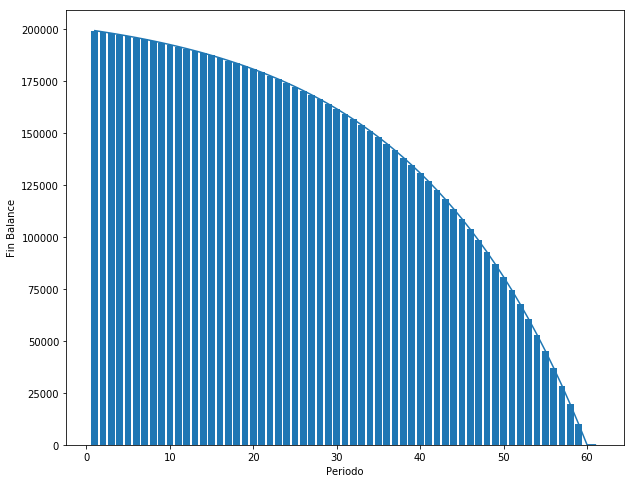

In [140]:
plt.figure(figsize=(10,8))
plt.bar(schedule6['Periodo'], schedule6['Fin Balance']);
plt.plot(schedule6['Periodo'], schedule6['Fin Balance']);
plt.xlabel("Periodo")
plt.ylabel("Fin Balance")

Text(0,0.5,'Principal')

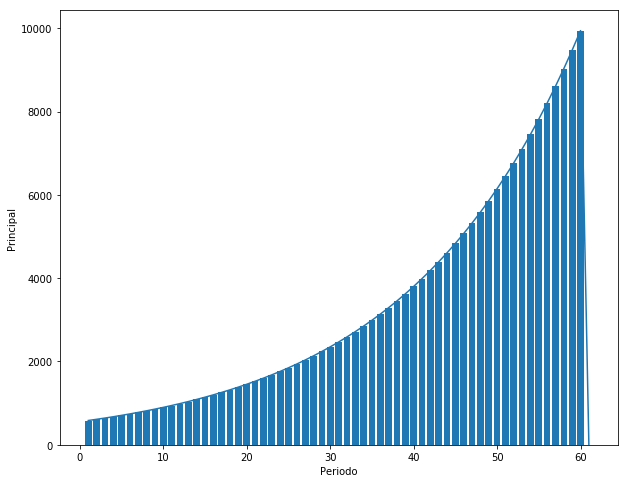

In [141]:
plt.figure(figsize=(10,8))
plt.bar(schedule6['Periodo'], schedule6['Principal']);
plt.plot(schedule6['Periodo'], schedule6['Principal']);
plt.xlabel("Periodo")
plt.ylabel("Principal")

Text(0,0.5,'Interes')

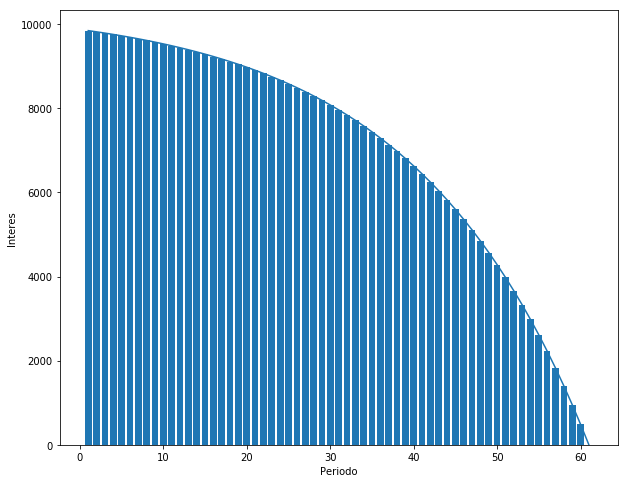

In [142]:
plt.figure(figsize=(10,8))
plt.bar(schedule6['Periodo'], schedule6['Interes']);
plt.plot(schedule6['Periodo'], schedule6['Interes']);
plt.xlabel("Periodo")
plt.ylabel("Interes")

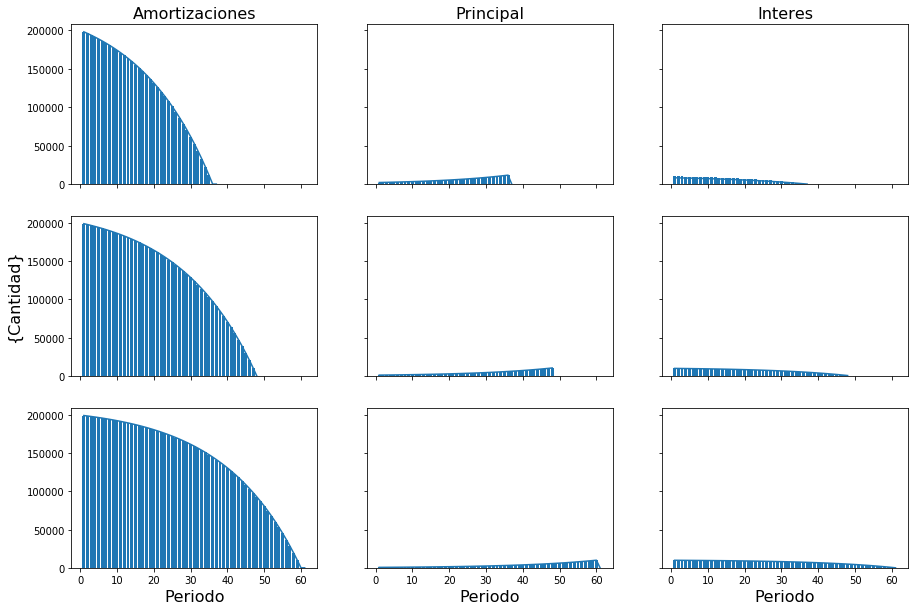

In [143]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6),(ax7,ax8,ax9)) = plt.subplots(3, 3, sharex='col',
                                                       sharey='row',figsize =(15,10))

ax1.plot(schedule4['Periodo'], schedule4['Fin Balance']);
ax1.bar(schedule4['Periodo'], schedule4['Fin Balance'])
ax1.set_title('Amortizaciones', fontsize = 16)
ax2.plot(schedule4['Periodo'], schedule4['Principal']);
ax2.bar(schedule4['Periodo'], schedule4['Principal']);
ax2.set_title('Principal', fontsize = 16)
ax3.bar(schedule4['Periodo'], schedule4['Interes']);
ax3.plot(schedule['Periodo'], schedule['Interes']);
ax3.set_title('Interes', fontsize = 16)
ax4.bar(schedule5['Periodo'], schedule5['Fin Balance']);
ax4.plot(schedule5['Periodo'], schedule5['Fin Balance']);
ax4.set_ylabel('{Cantidad}', fontsize = 16)
ax5.bar(schedule5['Periodo'], schedule5['Principal']);
ax5.plot(schedule5['Periodo'], schedule5['Principal']);
ax6.bar(schedule5['Periodo'], schedule5['Interes']);
ax6.plot(schedule5['Periodo'], schedule5['Interes']);
ax7.bar(schedule6['Periodo'], schedule6['Fin Balance']);
ax7.plot(schedule6['Periodo'], schedule6['Fin Balance']);
ax7.set_xlabel('Periodo', fontsize = 16)
ax8.bar(schedule6['Periodo'], schedule6['Principal']);
ax8.plot(schedule6['Periodo'], schedule6['Principal']); 
ax8.set_xlabel('Periodo', fontsize = 16)
ax9.bar(schedule6['Periodo'], schedule6['Interes']);
ax9.plot(schedule6['Periodo'], schedule6['Interes']);   
ax9.set_xlabel('Periodo', fontsize = 16)
plt.show()

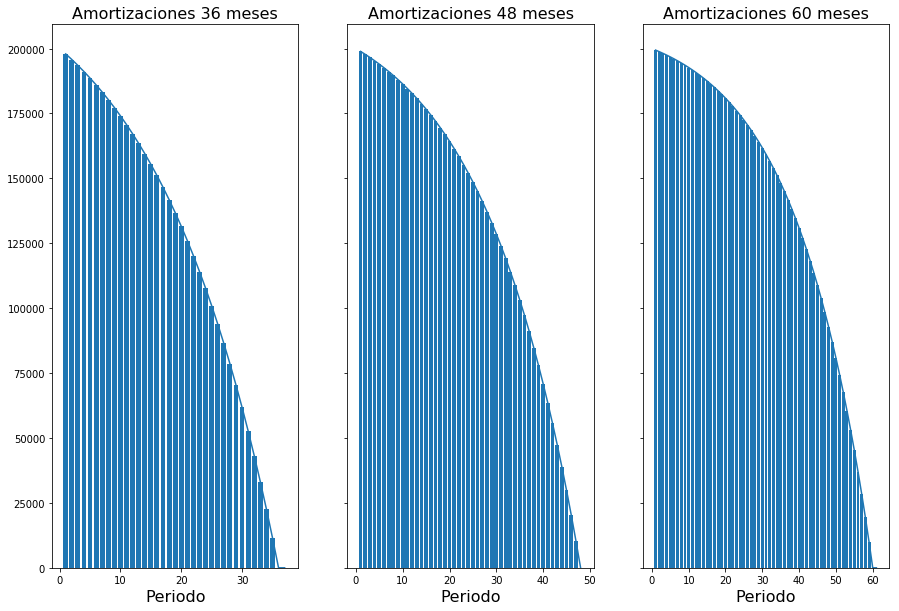

In [144]:
fig, ((ax1), (ax2),(ax3)) = plt.subplots(1, 3, sharex='col',
                                                       sharey='row',figsize =(15,10))

ax1.plot(schedule4['Periodo'], schedule4['Fin Balance']);
ax1.bar(schedule4['Periodo'], schedule4['Fin Balance'])
ax1.set_title('Amortizaciones 36 meses', fontsize = 16)
ax3.set_title("Amortizaciones 60 meses", fontsize=16)
ax1.set_xlabel('Periodo', fontsize = 16)
ax2.bar(schedule5['Periodo'], schedule5['Fin Balance']);
ax2.plot(schedule5['Periodo'], schedule5['Fin Balance']);
ax2.set_title("Amortizaciones 48 meses", fontsize=16)
ax2.set_xlabel('Periodo', fontsize = 16)
ax3.bar(schedule6['Periodo'], schedule6['Fin Balance']);
ax3.plot(schedule6['Periodo'], schedule6['Fin Balance']);
ax3.set_title("Amortizaciones 60 meses", fontsize=16)
ax3.set_xlabel('Periodo', fontsize = 16)
plt.show()

In [149]:
print(Apago_dummie36T)
print(Apago_dummie48T)
print(Apago_dummie60T)
print(Vpago_dummie36T)
print(Vpago_dummie48T)
print(Vpago_dummie60T)

385810.18
473687.71
631193.48
439328.72
524972.8
625892.29


In [150]:
df1 = pd.DataFrame(columns=['36 meses','48 meses','60 meses'], index = ['Agencia','Banco'])
df1.loc['Agencia', :] = [385810.18,473687.71,631193.48]
df1.loc['Banco',:]=[439328.72,524972.8,625892.29]
df1


,36 meses,48 meses,60 meses
Agencia,385810,473688,631193
Banco,439329,524973,625892


## Conclusión

- De acuerdo a los resultados, podemos observasr que el monto total al final de cada plazo es menor en la agencia que en el banco, auque este tenga una tasa de interes menor. 
- 